<a href="https://colab.research.google.com/github/PhaniBasava/Mcdonalds_analysis/blob/main/mcdonalds.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

In [2]:
df=pd.read_csv("/content/mcdonalds.csv")

In [4]:
df.head()


,yummy,convenient,spicy,fattening,greasy,fast,cheap,tasty,expensive,healthy,disgusting,Like,Age,VisitFrequency,Gender
0,No,Yes,No,Yes,No,Yes,Yes,No,Yes,No,No,-3,61,Every three months,Female
1,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,Yes,No,No,2,51,Every three months,Female
2,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes,Yes,No,1,62,Every three months,Female
3,Yes,Yes,No,Yes,Yes,Yes,Yes,Yes,No,No,Yes,4,69,Once a week,Female
4,No,Yes,No,Yes,Yes,Yes,Yes,No,No,Yes,No,2,49,Once a month,Male


In [5]:
df.shape

(1453, 15)

In [9]:
 df.columns.values.tolist()


['yummy',
 'convenient',
 'spicy',
 'fattening',
 'greasy',
 'fast',
 'cheap',
 'tasty',
 'expensive',
 'healthy',
 'disgusting',
 'Like',
 'Age',
 'VisitFrequency',
 'Gender']

In [18]:
MD_x = df.iloc[:, 0:11]
MD_x = (MD_x == "Yes").astype(int)
column_means = np.round(MD_x.mean(axis=0), 2)
column_means

,0
yummy,0.55
convenient,0.91
spicy,0.09
fattening,0.87
greasy,0.53
fast,0.90
cheap,0.60
tasty,0.64
expensive,0.36
healthy,0.20


In [19]:
import pandas as pd
from sklearn.decomposition import PCA
pca = PCA()
MD_pca = pca.fit_transform(MD_x)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = explained_variance_ratio.cumsum()
pca_summary = pd.DataFrame({
    'Explained Variance Ratio': explained_variance_ratio,
    'Cumulative Variance Ratio': cumulative_variance_ratio
})

print(pca_summary)

    Explained Variance Ratio  Cumulative Variance Ratio
0                   0.299447                   0.299447
1                   0.192797                   0.492244
2                   0.133045                   0.625290
3                   0.083096                   0.708386
4                   0.059481                   0.767866
5                   0.050300                   0.818166
6                   0.043849                   0.862015
7                   0.039548                   0.901563
8                   0.036761                   0.938323
9                   0.032353                   0.970677
10                  0.029323                   1.000000


In [21]:
import pandas as pd
from sklearn.decomposition import PCA
import numpy as np

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

std_devs = np.sqrt(pca.explained_variance_)

proportion_variance = pca.explained_variance_ratio_

cumulative_proportion = np.cumsum(proportion_variance)

summary_df = pd.DataFrame({
    'Standard deviation': std_devs,
    'Proportion of Variance': proportion_variance,
    'Cumulative Proportion': cumulative_proportion
})

print("Importance of components:")
print(summary_df.round(4))

loadings_df = pd.DataFrame(pca.components_.T, columns=[f'PC{i+1}' for i in range(MD_x.shape[1])], index=df.columns[:11])

# Displaying the Rotation matrix
print("\nRotation (n x k) = (11 x 11):")
print(loadings_df.round(1))


Importance of components:
    Standard deviation  Proportion of Variance  Cumulative Proportion
0               0.7570                  0.2994                 0.2994
1               0.6075                  0.1928                 0.4922
2               0.5046                  0.1330                 0.6253
3               0.3988                  0.0831                 0.7084
4               0.3374                  0.0595                 0.7679
5               0.3103                  0.0503                 0.8182
6               0.2897                  0.0438                 0.8620
7               0.2751                  0.0395                 0.9016
8               0.2653                  0.0368                 0.9383
9               0.2488                  0.0324                 0.9707
10              0.2369                  0.0293                 1.0000

Rotation (n x k) = (11 x 11):
            PC1  PC2  PC3  PC4  PC5  PC6  PC7  PC8  PC9  PC10  PC11
yummy      -0.5  0.4 -0.3  0.1 -0.3

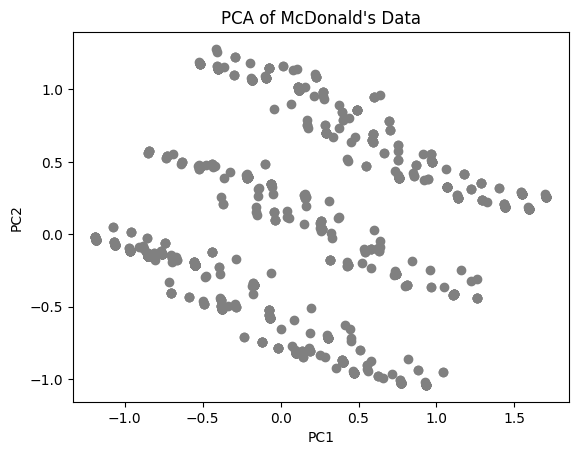

In [22]:
import matplotlib.pyplot as plt

pca = PCA()
MD_pca = pca.fit_transform(MD_x)

plt.scatter(MD_pca[:, 0], MD_pca[:, 1], color='grey')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('PCA of McDonald\'s Data')
plt.show()


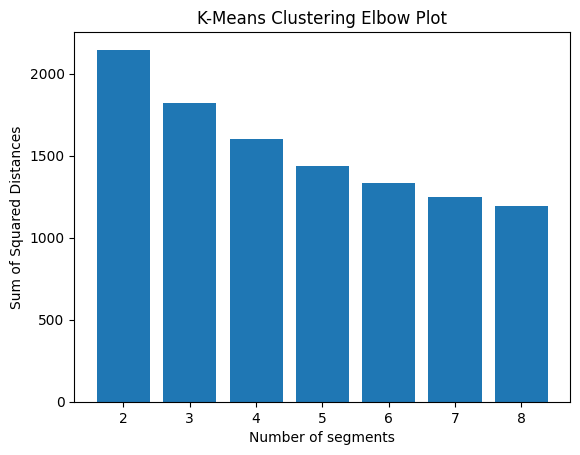

In [25]:

from sklearn.cluster import KMeans

np.random.seed(1234)

cluster_range = range(2, 9)
ssd = []

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234, verbose=0)
    kmeans.fit(MD_x)
    ssd.append(kmeans.inertia_)

plt.bar(cluster_range, ssd)
plt.xlabel('Number of segments')
plt.ylabel('Sum of Squared Distances')
plt.title('K-Means Clustering Elbow Plot')
plt.show()


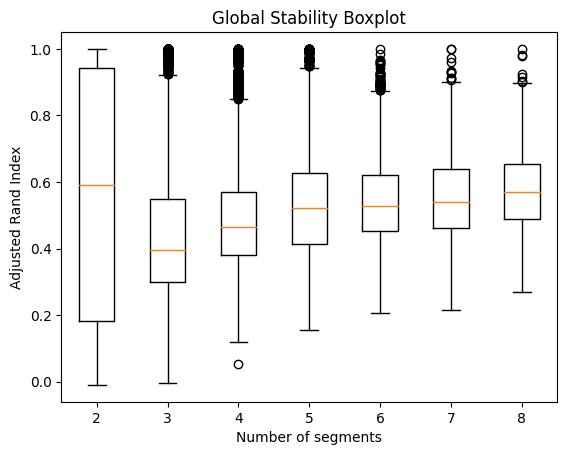

In [26]:
from sklearn.metrics import adjusted_rand_score
from sklearn.utils import resample

np.random.seed(1234)

cluster_range = range(2, 9)
nrep = 10
nboot = 100

ari_results = {k: [] for k in cluster_range}

for k in cluster_range:
    for _ in range(nboot):

        MD_x_boot = resample(MD_x, replace=True, random_state=1234)

        labels_list = []
        for _ in range(nrep):
            kmeans = KMeans(n_clusters=k, n_init=1, random_state=np.random.randint(0, 10000))
            kmeans.fit(MD_x_boot)
            labels_list.append(kmeans.labels_)

        for i in range(nrep):
            for j in range(i+1, nrep):
                ari = adjusted_rand_score(labels_list[i], labels_list[j])
                ari_results[k].append(ari)

ari_df = pd.DataFrame.from_dict(ari_results, orient='index').transpose()

plt.boxplot(ari_df, labels=cluster_range)
plt.xlabel('Number of segments')
plt.ylabel('Adjusted Rand Index')
plt.title('Global Stability Boxplot')
plt.show()


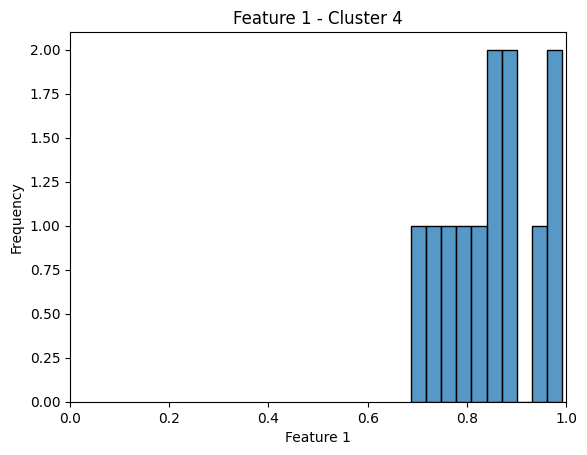

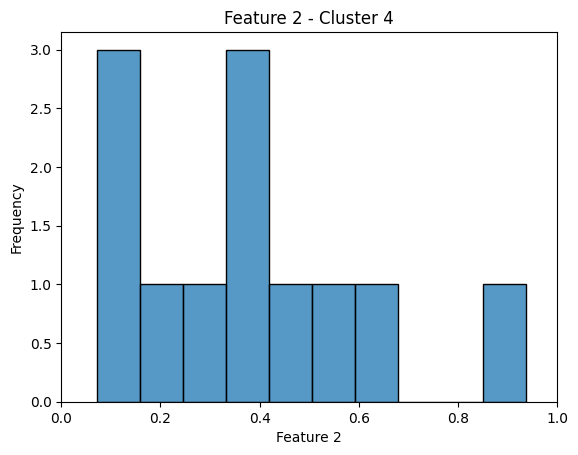

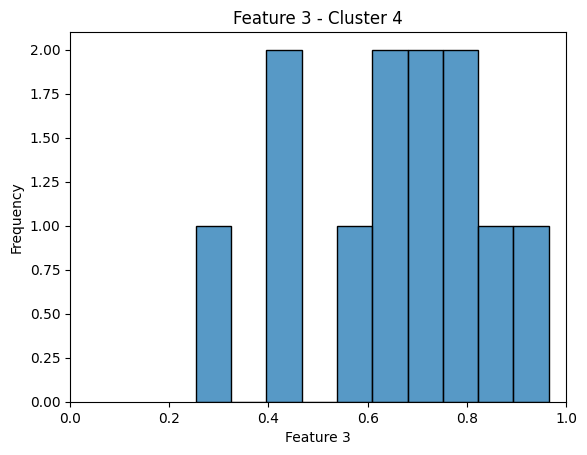

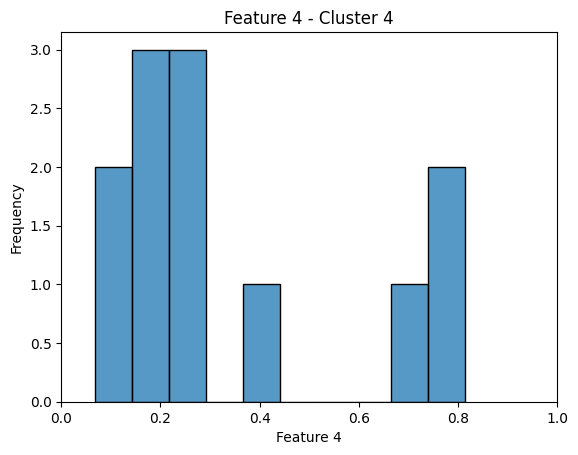

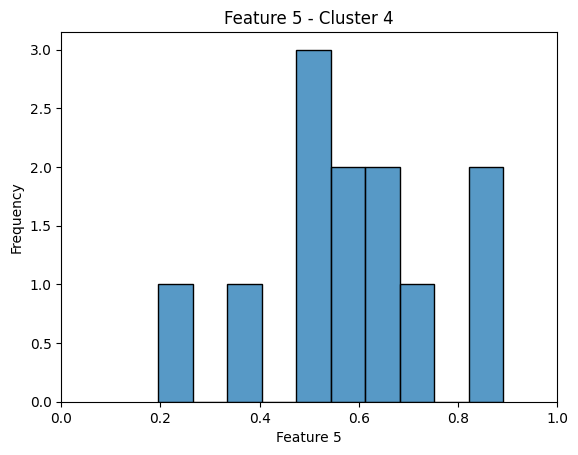

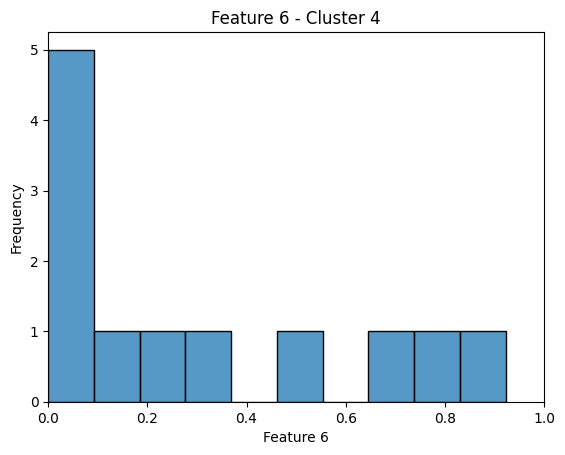

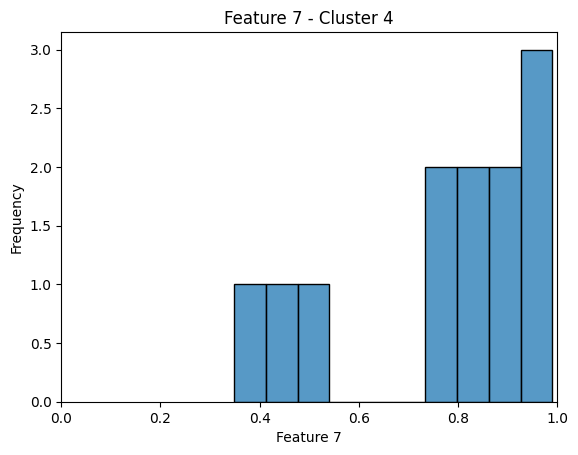

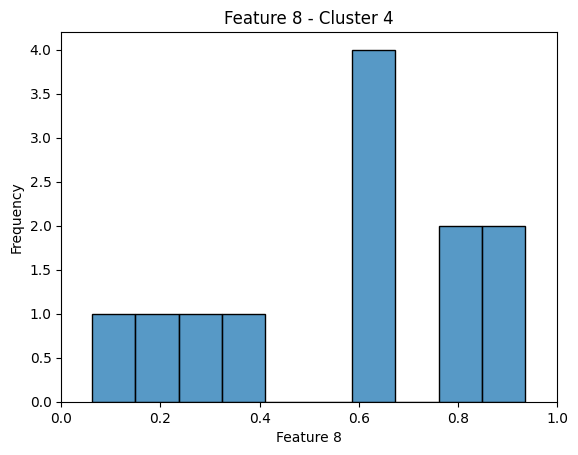

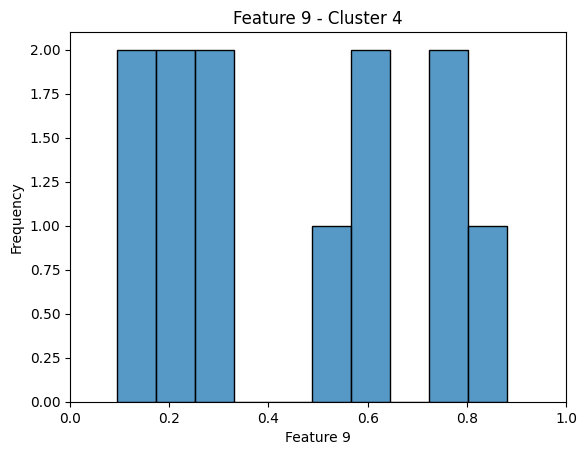

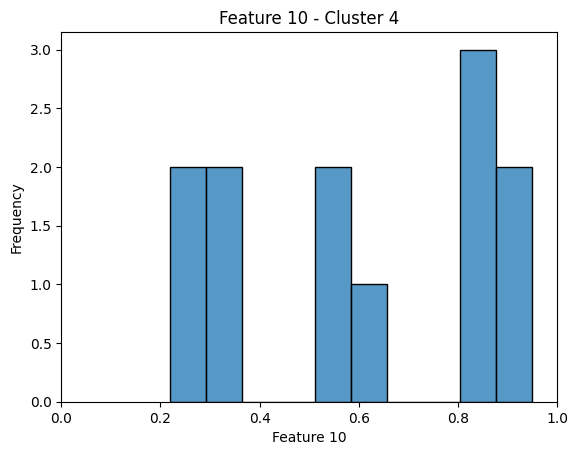

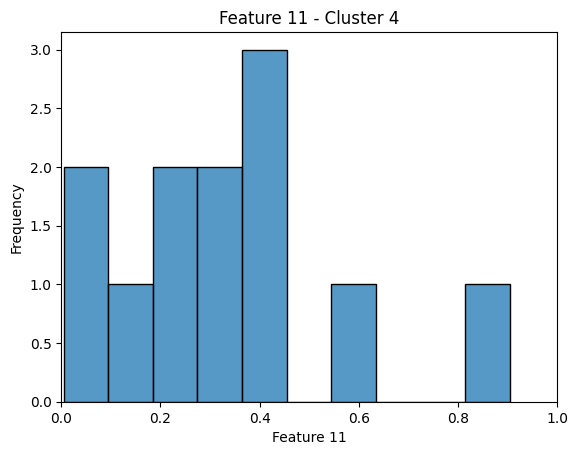

In [29]:
MD_x = np.random.rand(100, 11)  # Replace with actual data

kmeans = KMeans(n_clusters=8, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(MD_x)

cluster_id = 4

data_cluster = MD_x[cluster_labels == cluster_id]

for i in range(MD_x.shape[1]):
    plt.figure()
    sns.histplot(data_cluster[:, i], bins=10, kde=False)
    plt.xlim(0, 1)
    plt.title(f'Feature {i + 1} - Cluster {cluster_id}')
    plt.xlabel(f'Feature {i + 1}')
    plt.ylabel('Frequency')
    plt.show()



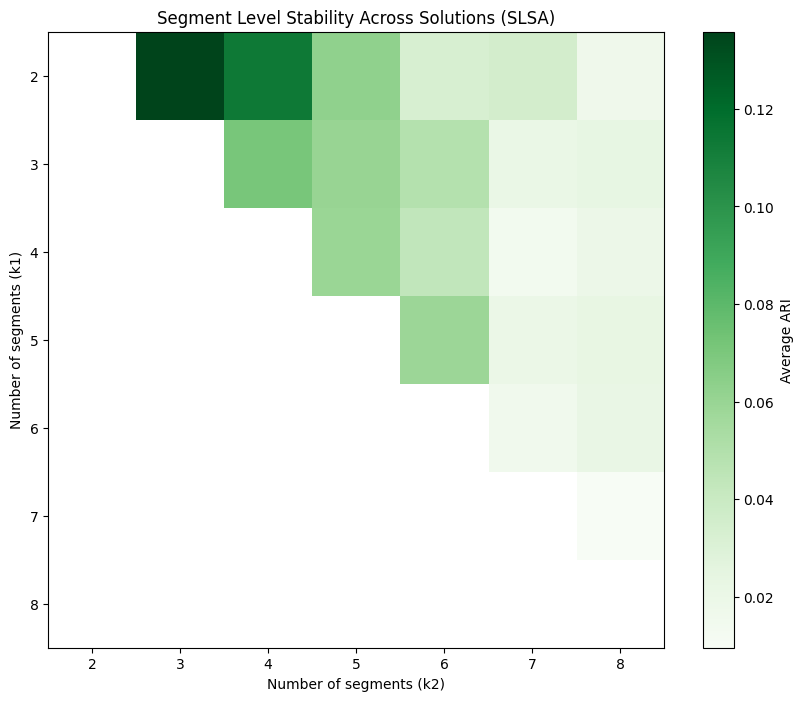

In [32]:
MD_x = np.random.rand(100, 11)

cluster_range = range(2, 9)

cluster_results = {}

for k in cluster_range:
    kmeans = KMeans(n_clusters=k, n_init=10, random_state=1234)
    cluster_labels = kmeans.fit_predict(MD_x)
    cluster_results[k] = cluster_labels

stability_df = pd.DataFrame(index=cluster_range, columns=cluster_range)

for k1 in cluster_range:
    labels1 = cluster_results[k1]
    for k2 in cluster_range:
        if k2 > k1:
            labels2 = cluster_results[k2]
            ari_scores = []
            for i in range(k1):
                for j in range(k2):
                    segment_i = (labels1 == i)
                    segment_j = (labels2 == j)
                    if np.any(segment_i) and np.any(segment_j):
                        ari_score = adjusted_rand_score(
                            segment_i.astype(int), segment_j.astype(int))
                        ari_scores.append(ari_score)
            stability_df.loc[k1, k2] = np.mean(ari_scores)

stability_df = stability_df.astype(float)

plt.figure(figsize=(10, 8))
plt.imshow(stability_df, cmap='Greens', interpolation='nearest')
plt.colorbar(label='Average ARI')
plt.xlabel('Number of segments (k2)')
plt.ylabel('Number of segments (k1)')
plt.title('Segment Level Stability Across Solutions (SLSA)')
plt.xticks(ticks=np.arange(len(cluster_range)), labels=cluster_range)
plt.yticks(ticks=np.arange(len(cluster_range)), labels=cluster_range)
plt.show()


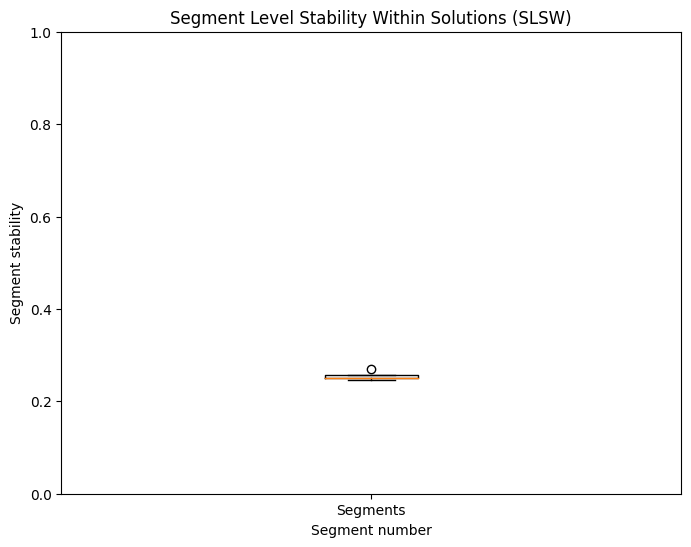

In [36]:
MD_x = np.random.rand(100, 11)

kmeans = KMeans(n_clusters=4, n_init=10, random_state=1234)
cluster_labels = kmeans.fit_predict(MD_x)

def compute_slsw(data, labels):
    unique_labels = np.unique(labels)
    stability = [np.std(data[labels == i], axis=0).mean() for i in unique_labels]
    return stability

MD_r4 = compute_slsw(MD_x, cluster_labels)

plt.figure(figsize=(8, 6))
plt.boxplot([MD_r4], labels=['Segments'])
plt.ylim(0, 1)
plt.xlabel('Segment number')
plt.ylabel('Segment stability')
plt.title('Segment Level Stability Within Solutions (SLSW)')
plt.show()


In [38]:
from sklearn.mixture import GaussianMixture

MD_x = np.random.randint(0, 2, size=(100, 11))  # Replace with actual binary data

mixture_models = {}
n_clusters = range(2, 9)
for k in n_clusters:
    model = GaussianMixture(n_components=k, init_params='kmeans', n_init=10, random_state=1234)
    model.fit(MD_x)
    mixture_models[k] = model

for k, model in mixture_models.items():
    print(f'Number of clusters: {k}')
    print(f'Log Likelihood: {model.score(MD_x)}')
    print(f'AIC: {model.aic(MD_x)}')
    print(f'BIC: {model.bic(MD_x)}')
    print()


Number of clusters: 2
Log Likelihood: -1.2124451159733751
AIC: 552.489023194675
BIC: 956.2904020228293

Number of clusters: 3
Log Likelihood: 1.8169649350653783
AIC: 102.60701298692436
BIC: 709.6116663221497

Number of clusters: 4
Log Likelihood: 3.782144719378714
AIC: -134.4289438757428
BIC: 675.7789839665538

Number of clusters: 5
Log Likelihood: 3.9640103964718403
AIC: -14.802079294368014
BIC: 998.6091230549996

Number of clusters: 6
Log Likelihood: 3.135066545598828
AIC: 306.9866908802344
BIC: 1523.6011677366735

Number of clusters: 7
Log Likelihood: 7.688337010668479
AIC: -447.66740213369576
BIC: 972.1503492298143

Number of clusters: 8
Log Likelihood: 8.702204192286018
AIC: -494.44083845720365
BIC: 1128.5801874133774



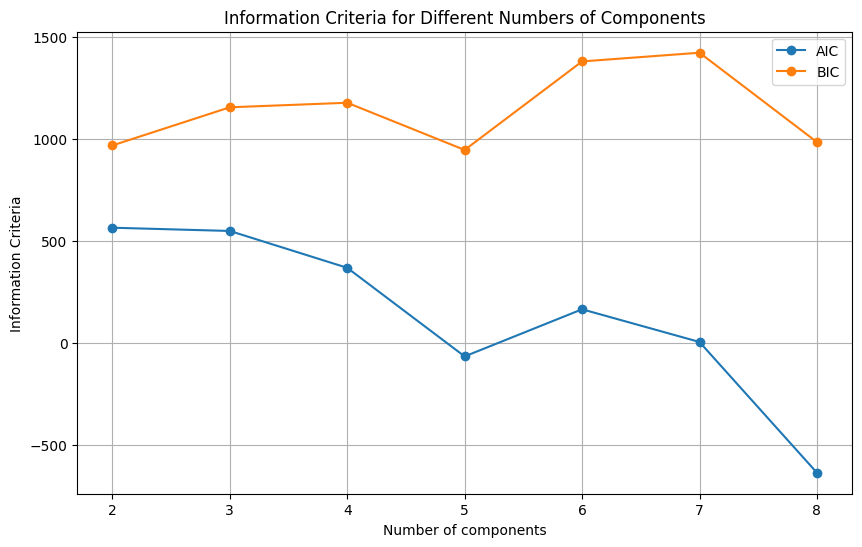

mixture  1  2  3   4
kmeans              
1        4  6  6  15
2        2  5  6  19
3        1  5  2  13
4        1  4  4   7


In [39]:
MD_x = np.random.randint(0, 2, size=(100, 11))

models = {}
n_clusters = range(2, 9)
aic_values = []
bic_values = []

for k in n_clusters:
    model = GaussianMixture(n_components=k, init_params='kmeans', n_init=10, random_state=1234)
    model.fit(MD_x)
    models[k] = model
    aic_values.append(model.aic(MD_x))
    bic_values.append(model.bic(MD_x))

plt.figure(figsize=(10, 6))
plt.plot(n_clusters, aic_values, marker='o', label='AIC')
plt.plot(n_clusters, bic_values, marker='o', label='BIC')
plt.xlabel('Number of components')
plt.ylabel('Information Criteria')
plt.title('Information Criteria for Different Numbers of Components')
plt.legend()
plt.grid(True)
plt.show()

kmeans_labels = np.random.randint(1, 5, size=100)
mixture_labels = models[4].predict(MD_x) + 1

cross_tab = pd.crosstab(kmeans_labels, mixture_labels, rownames=['kmeans'], colnames=['mixture'])
print(cross_tab)


In [47]:
reversed_table = df['Like'].value_counts(sort=False).iloc[::-1]
print(reversed_table)


Like
-1               58
-4               71
0               169
3               229
-2               59
I hate it!-5    152
I love it!+5    143
4               160
1               152
2               187
-3               73
Name: count, dtype: int64
